## TASK1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('DS2_C5_S1_Income_Data_Practice.csv')

In [3]:
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


## Task2

In [4]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [5]:
df.shape

(32561, 14)

In [6]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## TASK3

In [7]:
df.isna().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

## TASK4

In [8]:
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [9]:
df[['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']]=df[['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']].astype('category')

In [10]:
df.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [11]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
df['WorkClass_encode']= label_encoder.fit_transform(df['WorkClass'])
df['Education_encode']= label_encoder.fit_transform(df['Education'])
df['Marital_Status_encode']= label_encoder.fit_transform(df['Marital_Status'])
df['Occupation_encode']= label_encoder.fit_transform(df['Occupation'])
df['Relationship_encode']= label_encoder.fit_transform(df['Relationship'])
df['Gender_encode']= label_encoder.fit_transform(df['Gender'])
df['Native_Country_encode']= label_encoder.fit_transform(df['Native_Country'])
df['Income_Bracket_encode']= label_encoder.fit_transform(df['Income_Bracket'])


In [13]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_income_df = df.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_income_df.to_numpy()),columns=new_income_df.columns)
    return df_scaled

In [14]:
scale = 'minmax' #standard
income_df_scaled=feature_scale(scale)
income_df_scaled

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.875,0.600000,0.666667,0.071429,0.2,1.0,0.951220,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.750,0.600000,0.333333,0.285714,0.0,1.0,0.951220,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.500,0.733333,0.000000,0.428571,0.2,1.0,0.951220,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.500,0.066667,0.333333,0.428571,0.0,1.0,0.951220,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.500,0.600000,0.333333,0.714286,1.0,0.0,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.500,0.466667,0.333333,0.928571,1.0,0.0,0.951220,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.500,0.733333,0.333333,0.500000,0.0,1.0,0.951220,1.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.500,0.733333,1.000000,0.071429,0.8,0.0,0.951220,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.500,0.733333,0.666667,0.071429,0.6,1.0,0.951220,0.0


In [15]:
corr=income_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.088832,-0.001151,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,0.026858,-0.051966,-0.009463
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.012280,0.050840,0.335154
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.048480,-0.001982,0.223329
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.045567,0.000419,0.150526
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.229309,-0.002671,0.229689
WorkClass_encode,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.095981,-0.007690,0.051604
Education_encode,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,-0.027356,0.064288,0.079317
Marital_Status_encode,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.129314,-0.023819,-0.199307
Occupation_encode,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.080296,-0.012543,0.075468


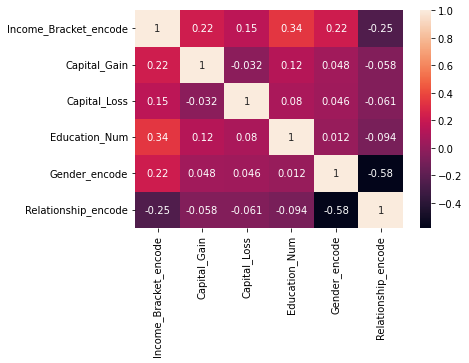

In [17]:
new_df_scaled=income_df_scaled[['Income_Bracket_encode','Capital_Gain', 'Capital_Loss','Education_Num', 'Gender_encode', 'Relationship_encode',]]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
plt.show()


## TASK5

In [18]:
income_df_c=df
train_num=int(32561*0.7)
income_df_train = income_df_c.iloc[:train_num,:]
income_df_test = income_df_c.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(income_df_train.shape, income_df_test.shape))

Shape of new dataframes - (22792, 22) , (9768, 22)


In [19]:
y = income_df_c['Income_Bracket_encode']
X = income_df_c
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (22792, 22) , (9769, 22)


## TASK6

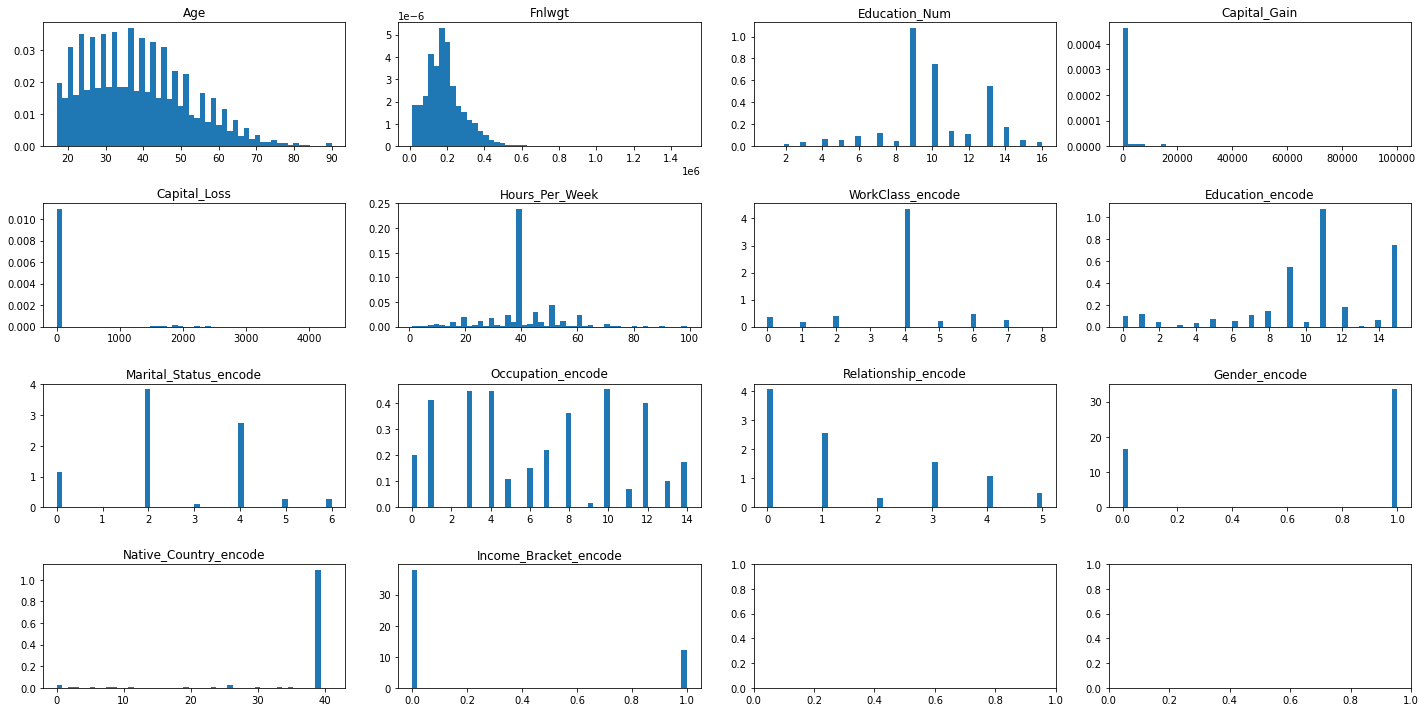

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_income_df = df.select_dtypes(include=numerics)
numeric_cols=new_income_df.columns
num_cols=4
n_bins = 50
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_income_df[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()
